# IS445 Final Project (Part 2)
#### By Yawen Feng

Continuing with the [2019 Men's Tennis match data](https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2019.csv), I am going to explore these four important attributes: **match date** (`tourney_date`),**court type** (`surface`),**match level** (`tourney_level`), and **match score** (`score`). 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bqplot
import ipywidgets

In [168]:
atp2019=pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
atp2019=atp2019[['surface', 'tourney_level','tourney_date', 
                 'winner_seed','winner_name', 'winner_ht', 'winner_ioc', 'winner_age',
                 'loser_seed', 'loser_name',  'loser_ht', 'loser_ioc', 'loser_age', 
                 'score', 'round', 'minutes', 
                 'w_ace', 'w_df', 'l_ace', 'l_df',
                 'winner_rank', 'loser_rank']]
atp2019['tourney_date'] = pd.to_datetime(atp2019['tourney_date'], format='%Y%m%d') #Reference: https://datatofish.com/integers-datetime-pandas-dataframe/
atp2019 = atp2019.sort_values(by=['tourney_date'])
atp2019

,surface,tourney_level,tourney_date,winner_seed,winner_name,winner_ht,winner_ioc,winner_age,loser_seed,loser_name,...,loser_age,score,round,minutes,w_ace,w_df,l_ace,l_df,winner_rank,loser_rank
0,Hard,A,2018-12-31,2.0,Kei Nishikori,178.0,JPN,29.004791,4.0,Daniil Medvedev,...,22.885695,6-4 3-6 6-2,F,124.0,3.0,3.0,8.0,6.0,9.0,16.0
62,Hard,A,2018-12-31,3.0,Gilles Simon,183.0,FRA,34.009582,5.0,Benoit Paire,...,29.648186,3-6 7-6(4) 6-4,QF,139.0,4.0,4.0,11.0,12.0,30.0,52.0
61,Hard,A,2018-12-31,1.0,Kevin Anderson,203.0,RSA,32.621492,7.0,Jaume Munar,...,21.656400,6-3 6-3,QF,68.0,14.0,1.0,3.0,1.0,6.0,81.0
60,Hard,A,2018-12-31,NaN,Ivo Karlovic,208.0,CRO,39.838467,NaN,Steve Darcis,...,34.800821,7-6(3) 4-6 6-3,SF,115.0,33.0,4.0,3.0,2.0,100.0,NaN
59,Hard,A,2018-12-31,1.0,Kevin Anderson,203.0,RSA,32.621492,3.0,Gilles Simon,...,34.009582,6-3 7-6(3),SF,108.0,21.0,2.0,1.0,0.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,Hard,D,2019-11-23,NaN,Andrey Rublev,NaN,RUS,22.078029,NaN,Vasek Pospisil,...,29.404517,6-4 6-4,RR,85.0,3.0,3.0,16.0,3.0,23.0,150.0
2652,Hard,D,2019-11-23,NaN,Rafael Nadal,185.0,ESP,33.459274,NaN,Daniel Evans,...,29.489391,6-4 6-0,RR,85.0,9.0,0.0,4.0,2.0,1.0,42.0
2651,Hard,D,2019-11-23,NaN,Kyle Edmund,NaN,GBR,24.859685,NaN,Feliciano Lopez,...,38.160164,6-3 7-6(3),RR,81.0,9.0,0.0,8.0,3.0,69.0,62.0
2649,Hard,D,2019-11-24,NaN,Roberto Bautista Agut,183.0,ESP,31.594798,NaN,Felix Auger Aliassime,...,19.277207,7-6(3) 6-3,RR,109.0,1.0,1.0,4.0,6.0,9.0,21.0


When talking about the score, there are several basic concepts in tennis scoring: (Reference: http://protennistips.net/tennis-rules/)

- **Point** – Smallest unit of measurement. Points increment from Love(0)-15-30-40-game.

- **Game** – Each games consist of 4 points, and is won when a player reaches 4 points with at least a 2 point advantage.

- **Set** – A set consists of 6 games, and is won by the player who reaches 6 games first with least a 2 point lead.

- **Match** – A match is usually played as best of 3 or best of 5 sets.

Especially, two concepts in tennis rules need to be introduced here before our analysis and visualization:

- **Tie-break** – If a game score of 6-6 is reached and tie-break set rules are used (otherwise advantage set rules are used, but usually only in the Wimbledon Open), players must play a tie-break game, in which a player/team must reach 7 points with a two point advantage to win. In this case, the score of this set will be shown as 7-6(number of points the set loser got in the tie-break game).

- **Bagel**: A set ends with a score of 6-0.

Basically, a set ending with a tie-break is usually fierce and indicates that the players' performances are on similar levels, while a bagel indicates that one player defeats the other relatively easily.

In [169]:
def bagel(row):
    return row['score'].count('6-0')+row['score'].count('0-6') # find out the number of bagels in a match

def tiebreak(row):
    return row['score'].count('7-6')+row['score'].count('6-7') # find out the number of tie-breaks in a match

atp2019['bagel']=atp2019.apply(lambda row: bagel(row), axis=1)  # Reference:https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
atp2019['tiebreak']=atp2019.apply(lambda row: tiebreak(row), axis=1)


For my dashboard, firstly I would like to explore the relationship between **court type** and **match level**.

In [170]:
court_level=atp2019.groupby(by=["surface","tourney_level"]).count().reset_index('tourney_level')
court_level=court_level.pivot_table(values='tourney_date',index=court_level.index, columns='tourney_level', aggfunc='first').fillna(0)
court_level

tourney_level,A,D,F,G,M
surface,,,,,
Clay,491.0,45.0,0.0,127.0,165.0
Grass,197.0,3.0,0.0,127.0,0.0
Hard,831.0,124.0,15.0,254.0,402.0


If I am only going to make one visualization rather than a dashboard, this visualization can be done with `Matplotlib` as belows. 

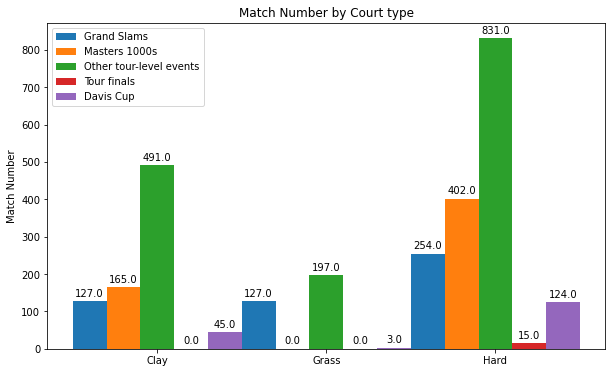

In [171]:
#Reference: https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

fig,ax=plt.subplots(figsize=(10,6))
x = np.arange(len(court_level.index))  # the x-axis label locations
width = 0.2

#Draw values in the five columns in court_level respectively.

bar1  = ax.bar(x - width*2, court_level['G'], width, label='Grand Slams')
bar2  = ax.bar(x - width, court_level['M'], width, label='Masters 1000s')
bar3  = ax.bar(x, court_level['A'], width, label='Other tour-level events')
bar4  = ax.bar(x + width, court_level['F'], width, label='Tour finals')
bar5  = ax.bar(x + width*2, court_level['D'], width, label='Davis Cup')

def autolabel(rects):  # Add labels above the bars.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)

ax.set_ylabel('Match Number')
ax.set_title('Match Number by Court type')
ax.set_xticks(x)
ax.set_xticklabels(court_level.index)
ax.legend()

plt.show()

However, since I am going to make an interactive dashboard, I decide to visualize it with `bqplot`.

In [172]:
def on_selected(change):           #Preparation for the interaction
    if len(change['owner'].selected) == 1: #only 1 selected
        court_type = court_level.index[change['owner'].selected[0]] # grab the x coordinates
        court = atp2019[atp2019['surface']==court_type][['tourney_date','bagel','tiebreak']]
        court['cum_bagel'] = court['bagel'].cumsum()  
        court['cum_tiebreak'] = court['tiebreak'].cumsum()
        # update the line plot 
        bqline.x = court['tourney_date'] 
        bqline.y = [court['cum_bagel'],court['cum_tiebreak']]
        

#(1)Scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
c_sc = bqplot.OrdinalColorScale()

#(2)Axes
ax_x = bqplot.Axis(scale = x_sc, label = 'Court Type')
ax_y = bqplot.Axis(scale = y_sc, label = 'Match Number', 
                    orientation = 'vertical')
ax_c = bqplot.ColorAxis(scale = c_sc, label = 'Match Level',side = 'right')

#(3)Marks
bqbar = bqplot.Bars(x = court_level.index, 
                    y = [court_level['G'],court_level['M'],court_level['A'],court_level['F'],court_level['D']], 
                    color = ['Grand Slams','Masters 1000s','Other tour-level events','Tour finals','Davis Cup'], 
                    scales = {'x': x_sc, 'y': y_sc, 'color':c_sc},
                    type='grouped',
                    interactions = {'click': 'select'},
                    selected_style={'stroke': 'orange', 'fill': 'blue','opacity':0.5})

#(4)Link interaction
bqbar.observe(on_selected, 'selected')

#(5)Figure
fig2 = bqplot.Figure(marks = [bqbar], 
                    axes = [ax_x, ax_y,ax_c],
                    fig_margin = {'top':50, 'bottom':60, 'left':50, 'right':300},
                    title='ATP Match Numbers of Each Court Type in 2019')


The second part of the dashboard tries to visualize how many tie-breaks and bagels occurred as time passed in 2019, based on viewer's choice of court type through clicking in the first visualization.

In [173]:
hard = atp2019[atp2019['surface']=='Hard'][['tourney_date','bagel','tiebreak']] 
hard['cum_bagel'] = hard['bagel'].cumsum()  #create a new column of cumulative bagel sums
hard['cum_tiebreak'] = hard['tiebreak'].cumsum() #a new column of cumulative tie-break sums

#(1)Scales
x_scale = bqplot.DateScale()
y_scale = bqplot.LinearScale(min=0,max=1000)


#(2)Axes
axis_x = bqplot.Axis(scale = x_scale, label = 'Date')
axis_y = bqplot.Axis(scale = y_scale, label = 'Cumulative Sum', 
                    orientation = 'vertical')


#(3)Marks
bqline = bqplot.Lines(x = hard['tourney_date'], #"hard" here is just a temporary placeholder
                      y = [hard['cum_bagel'],hard['cum_tiebreak']], 
                      scales = {'x': x_scale, 'y': y_scale})


#(5)Figure
fig3 = bqplot.Figure(marks = [bqline], 
                    axes = [axis_x, axis_y],
                    title="ATP's Bagels and Tiebreaks in 2019")


Following is my dashboard in which the two linked visualizations are located together vertically.

**Instruction of Use**

Click on any part of the bars in the first plot to choose the court type on which you want the second plot to be based (Default: hard court). The bars turning purplish blue in the first plot indicate the court you choose for the second plot. 

In [174]:
myDashboard = ipywidgets.VBox([fig2,fig3])
myDashboard

### Contextual Datasets

1. ATP (Men's tennis) match data in other years, for example, 2011-2018.
- 2011: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2011.csv
- 2012: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2012.csv
- 2013: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2013.csv
- 2014: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2014.csv
- 2015: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2015.csv
- 2016: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2016.csv
- 2017: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2017.csv
- 2018: https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2018.csv

They might be useful as they can help to analyze and visualize how ATP matches have changed through the 2010s.

2. WTA (Women's tennis) match data of 2019.
- https://github.com/JeffSackmann/tennis_wta/blob/master/wta_matches_2019.csv

It might be useful as it can help to tell the difference between men's matches and women's matches.